# Inspect Darwinex spreads from recent market action

In [1]:
import pandas as pd
import glob
%matplotlib inline

In [2]:
def load_ticks(file):
    names = ['ask', 'volume'] if file.find('ASK') > 0 else ['bid', 'volume']
    df = pd.read_csv(f"{file}", compression="gzip", header=None, index_col=0, names=names)
    df.index = pd.to_datetime(df.index, unit='ms')
    df.index.name = 'datetime'
    
    return df

def make_spread(ask_file, bid_file):
    ticks = pd.concat([ask_file, bid_file], axis=0, sort=True)
    ticks.sort_index(inplace=True)
    ticks.fillna(method='ffill', inplace=True)
    ticks['spread'] = ticks['ask'] - ticks['bid']
    ticks.loc[ticks['spread'] < 0, 'spread'] = 0
    
    return ticks  

## Look at a single hour of bid-ask prices

In [3]:
data_folder = "C:\\Users\\Kris\\Documents\\ticks"
ask_file = f"{data_folder}\\EURAUD_ASK_2020-03-10_00.log.gz"
bid_file = f"{data_folder}\\EURAUD_BID_2020-03-10_00.log.gz"

ask = load_ticks(ask_file)
bid = load_ticks(bid_file)
ask.head()

,ask,volume
datetime,,
2020-03-10 00:00:00.030,1.72785,100000.0
2020-03-10 00:00:00.040,1.72787,500000.0
2020-03-10 00:00:00.055,1.72788,500000.0
2020-03-10 00:00:00.082,1.72787,500000.0
2020-03-10 00:00:00.094,1.72785,500000.0


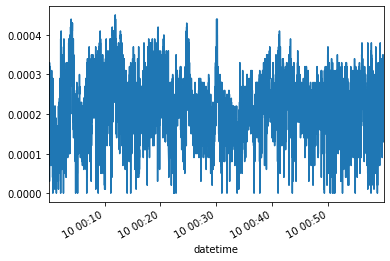

In [4]:
ticks = make_spread(ask, bid)
ticks['spread'].plot();

## Combine several days of tick files and plot

In [5]:
def combine_ticks(pair, data_folder):
    ask_files = glob.glob(f"{data_folder}\\{pair}_ASK*")
    bid_files = [i.replace('ASK', 'BID') for i in ask_files]
    
    ticks = []
    for a, b, in zip(ask_files, bid_files):
        ask = load_ticks(a)
        bid = load_ticks(b)
        ticks.append(make_spread(ask, bid))

    combined_ticks = pd.concat(ticks, axis=0)
    
    return combined_ticks    

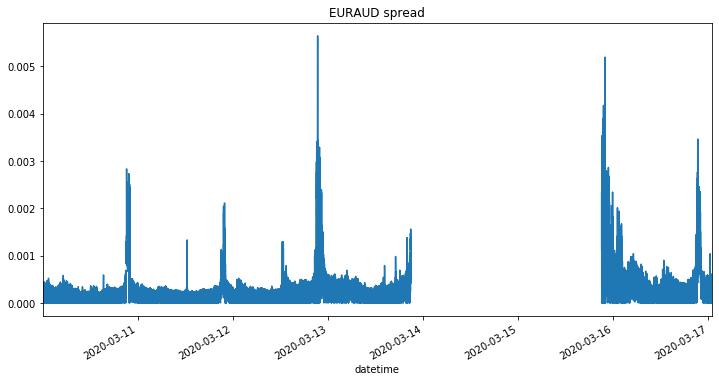

In [6]:
pair = 'EURAUD'
combined_ticks = combine_ticks(pair, data_folder)
combined_ticks['spread'].plot(figsize=(12,6), title=f"{pair} spread");

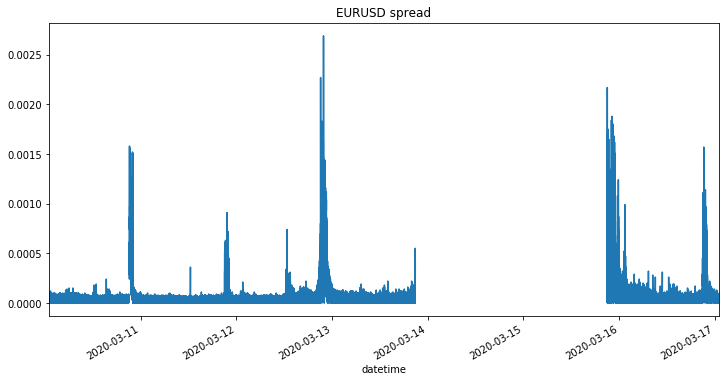

In [7]:
pair = 'EURUSD'
combined_ticks = combine_ticks(pair, data_folder)
combined_ticks['spread'].plot(figsize=(12,6), title=f"{pair} spread");